In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 28: Method of Moments Estimation

We will continue this block with a brief look into estimators and their properties. Suppose we are presented with a random sample of observations and we are interested in the true underlying process from which these observations originated. If we know, or assume, the underlying distribution of these data, we can use the sample to estimate the parameters of that distribution. 

Specifically, let $x_1,x_2,...,x_n$ be an iid (independent, identically distributed) sample from a distribution with a single parameter $\theta$. Typically, the expected value (or average) of a random variable with this distribution can be expressed as a function of $\theta$. We also know that the sample mean, $\bar{X}$ is our best guess at true mean, given our data. So we simply set $E(X)$ equal to our sample mean and solve for $\theta$. The result is the method of moments estimate of $\theta$, and we write it as $\hat{\theta}_{MoM}$. 

### Example 1: Exponential Distribution

Suppose $x_1,x_2,...,x_n$ is a random sample of size $n$ from the exponential distribution with unknown parameter $\lambda$. I would like to obtain $\hat{\lambda}_{MoM}$, the method of moments estimate of $\lambda$. 

From last block, I know that if $X\sim \textsf{Exp}(\lambda)$, then $E(X)=\frac{1}{\lambda}$. In other words, our true, population average is $1 \over \lambda$. Our best guess of our average given our data is simply the sample mean $\bar{X}$. So, ideally, $1 \over \lambda$ should be close to $\bar{X}$. We set these two equal to each other and solve for $\lambda$:

$$
{1 \over \lambda} = \bar{X}
$$

$$
\hat{\lambda}_{MoM} = {1 \over \bar{X}}
$$

### Example 2: Uniform Distribution

Suppose $x_1,x_2,...,x_n$ is a random sample of size $n$ from the uniform distribution on the domain $0\leq X \leq b$. In other words, $X\sim \textsf{Unif}(0,b)$. Find $\hat{b}_{MoM}$, the method of moments estimate of b. 

$E(X)=b \over 2$, so $\hat{b}_{MoM} = 2\bar{X}$. 

Suppose I obtain the following values in my sample: $(0.2,0.4,0.3,0.9,0.4)$. What is our estimate of $b$? What is wrong with that estimate? 

In [7]:
np.mean([0.2,0.4,0.3,0.9,0.4])

0.44000000000000006

Our estimate of $b$ is 0.88, but we know this is a bad estimate because a value in our sample exceeds 0.88. 

## Multiple Parameters

We can extend this to more than one parameter. Suppose our sample comes from a distribution with multiple parameters. We would simply use the higher moments and solve the resulting system of equations. 

### Example 3: Normal Distribution

Suppose $x_1,x_2,...,x_n$ is a random sample of size $n$ from the normal distribution with unknown parameters $\mu$ and $\sigma$. I would like to obtain $\hat{\mu}_{MoM}$ and $\hat{\sigma}_{MoM}$. 

This is fairly straight forward, since $\mu$ and $\sigma$ are directly interpreted as the mean and standard deviation. Specifically, if $X\sim \textsf{Norm}(\mu,\sigma)$, then $E(X)=\mu$. Thus, $\hat{\mu}_{MoM} = \bar{X}$. Further, $Var(X)=\sigma^2$, so we can set this equal to the second sample moment around the mean: 
$$
Var(X)=\sigma^2 \approx {\sum (X_i-\bar{X})^2 \over n}
$$

So,
$$
\hat{\sigma}_{MoM} = \sqrt{{\sum (X_i-\bar{X})^2 \over n}}
$$

### Example 4: Gamma Distribution

Suppose $x_1,x_2,...,x_n$ is a random sample of size $n$ from the Gamma distribution with unknown parameters $\alpha$ and $\lambda$. Find $\hat{\alpha}_{MoM}$ and $\hat{\lambda}_{MoM}$. 


Recall that if $X\sim \textsf{Gamma}(\alpha,\lambda)$, $E(X)={\alpha \over \lambda}$ and $Var(X)={\alpha \over \lambda^2}$. So,

$$
{\alpha \over \lambda} \approx \bar{X}
$$

and

$$
{\alpha \over \lambda^2} \approx {\sum (X_i-\bar{X})^2 \over n}
$$

Solving this system of equations yields
$$
\hat{\alpha}_{MoM} = {n\bar{X}^2 \over \sum (X_i-\bar{X})^2 } 
$$
$$
\hat{\lambda}_{MoM} = {n\bar{X} \over \sum (X_i-\bar{X})^2 } 
$$

## Bias

Note that our method of moment estimates are themselves random variables (since they are based on random samples). Thus, each time I obtain a new sample, I will get a new method of moments estimate of my paramter. Over time the average of those estimates should be close to the true value of the paramter. In other words, $E(\hat{\theta}_{MoM})$ should equal $\theta$. If not, the estimate is said to be biased. 

### Example 5
Going back to the normal example, find $E(\hat{\mu}_{MoM})$ and $E(\hat{\sigma}^2_{MoM})$. 

First, recall that if $X\sim \textsf{Norm}(\mu,\sigma)$, then 

1. $E(X)=\mu$ 

2. $Var(X)=E(X^2)-E(X)^2 = \sigma^2$, so $E(X^2)=\sigma^2 + \mu^2$

3. $\bar{X} \sim \textsf{Norm}(\mu,{\sigma^2 \over n})$

    a. $E(\bar{X})=\mu$

    b. $E(\bar{X}^2)={\sigma^2 \over n} + \mu^2$


$$
E(\hat{\mu}_{MoM}) = E(\bar{X}) = E\left({X_1 + X_2 + ... + X_n \over n}\right) = {1\over n}n\mu = \mu
$$
$$
E(\hat{\sigma}^2_{MoM})=E\left({\sum (X_i-\bar{X})^2 \over n}\right) = \mu^2 + \sigma^2 - \mu^2 - {\sigma^2 \over n} = \left({n-1 \over n}\right) \sigma^2
$$

Note that $\hat{\sigma}^2_{MoM}$ is a biased estimate of $\sigma$. 

In [21]:
n=20
mom_lam=[1./np.mean(stats.expon.rvs(scale=0.2,size=n)) for _ in np.arange(10000)]
print(np.mean(mom_lam))
print(np.mean(mom_lam)*(n-1)/n)

5.2469320447154235
4.984585442479652


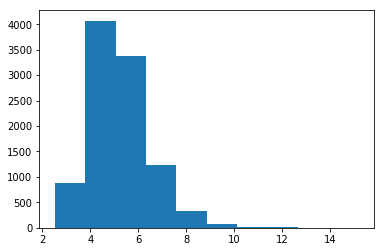

In [3]:
plt.hist(mom_lam)
plt.show()

In [6]:
np.mean(mom_lam)

5.245655401403963